## SENTIMENT ANALYSIS IMPLEMENTATION

### Exercise 1
<br> Take any English text you want, and calculate the frequency of its words.


In [183]:
#import required libraries
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia
import numpy as np
import seaborn as sns


In [184]:
nltk.__version__

'3.6.5'

In [185]:
#Text to be analized: A google review from a coffee place
text = """I had a hard time finding good coffee in Barcelona, until I found BRKLYN. Which not only has AMAZING coffee, but delicious treats and meals.
It is a place that invites you to stay for long periods, with the perfect environment to work and last but not least, warm service."""
tokenized_text = word_tokenize(text)

In [186]:
print(tokenized_text)

['I', 'had', 'a', 'hard', 'time', 'finding', 'good', 'coffee', 'in', 'Barcelona', ',', 'until', 'I', 'found', 'BRKLYN', '.', 'Which', 'not', 'only', 'has', 'AMAZING', 'coffee', ',', 'but', 'delicious', 'treats', 'and', 'meals', '.', 'It', 'is', 'a', 'place', 'that', 'invites', 'you', 'to', 'stay', 'for', 'long', 'periods', ',', 'with', 'the', 'perfect', 'environment', 'to', 'work', 'and', 'last', 'but', 'not', 'least', ',', 'warm', 'service', '.']


In [187]:
from nltk.corpus import stopwords
# delete stop words
stopwords_here = set(stopwords.words('english'))
filtered_paragraph = []
punctuation_marks = ['.',',','”', '“']
stopwords_here.update(punctuation_marks)


for w in tokenized_text: 
    if w not in stopwords_here  :   
        filtered_paragraph.append(w)

print(filtered_paragraph)
        

['I', 'hard', 'time', 'finding', 'good', 'coffee', 'Barcelona', 'I', 'found', 'BRKLYN', 'Which', 'AMAZING', 'coffee', 'delicious', 'treats', 'meals', 'It', 'place', 'invites', 'stay', 'long', 'periods', 'perfect', 'environment', 'work', 'last', 'least', 'warm', 'service']


In [188]:
len(filtered_paragraph)

29

In [189]:
#Check the frecuency of words in the text
from nltk.probability import FreqDist
frequency_stopwords = FreqDist(filtered_paragraph).most_common(10)
print(frequency_stopwords)

[('I', 2), ('coffee', 2), ('hard', 1), ('time', 1), ('finding', 1), ('good', 1), ('Barcelona', 1), ('found', 1), ('BRKLYN', 1), ('Which', 1)]


In [190]:
frequency = pd.Series(dict(frequency_stopwords))

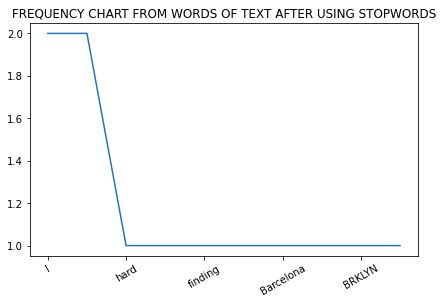

In [191]:
#ploting the frequency distribution 
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.title("FREQUENCY CHART FROM WORDS OF TEXT AFTER USING STOPWORDS")
frequency.plot()
plt.tight_layout()
plt.xticks(rotation=30)
plt.show()

### Exercise 2
<br> Remove the stopwords and perform stemming on your dataset.


Since the stop words were removed already we will be performing stemming with the purpose of reducing possible duplicates of words and therefore getting a more accurate representation of the data.

In [192]:
#import the necessary libraries 
from nltk.stem import PorterStemmer
#Create object Stemmer
porter_stemmer = PorterStemmer()

#Create list where words will be stored after lemmatization
stemmed_words = []

#Perform stemming and add list of stemmed words into the stemed_words list
for w in filtered_paragraph:
    stemmed_words.append(porter_stemmer.stem(w))
print('Filtered Sentence: ', stemmed_words)


Filtered Sentence:  ['i', 'hard', 'time', 'find', 'good', 'coffe', 'barcelona', 'i', 'found', 'brklyn', 'which', 'amaz', 'coffe', 'delici', 'treat', 'meal', 'it', 'place', 'invit', 'stay', 'long', 'period', 'perfect', 'environ', 'work', 'last', 'least', 'warm', 'servic']


In [193]:
#Find out the frequency of stemmed words
frequency_of_stemmed_words = FreqDist(stemmed_words).most_common(10)
print(frequency_of_stemmed_words)

[('i', 2), ('coffe', 2), ('hard', 1), ('time', 1), ('find', 1), ('good', 1), ('barcelona', 1), ('found', 1), ('brklyn', 1), ('which', 1)]


The text result after using the stemmed method shows some trimmed words, which could generate some missmatches when it comes to classify. So let's try with lemmatization.

In [194]:
#import the needed library
from nltk.stem.wordnet import WordNetLemmatizer
#create object Lemmatizer
lematizer = WordNetLemmatizer()
#Create list where words will be stored after lemmatization
lemmatized_words = []

# Perform lemmatization and add new words to the list
for w in filtered_paragraph:
    lemmatized_words.append(lematizer.lemmatize(w))
print(lemmatized_words)


['I', 'hard', 'time', 'finding', 'good', 'coffee', 'Barcelona', 'I', 'found', 'BRKLYN', 'Which', 'AMAZING', 'coffee', 'delicious', 'treat', 'meal', 'It', 'place', 'invite', 'stay', 'long', 'period', 'perfect', 'environment', 'work', 'last', 'least', 'warm', 'service']


In [195]:
#Find the frequency of lemmatized words for the 0 most common ones
frequency_of_lemmatized_words = FreqDist(lemmatized_words).most_common(10)
print(frequency_of_lemmatized_words)
frequency_of_lemmatized_words

[('I', 2), ('coffee', 2), ('hard', 1), ('time', 1), ('finding', 1), ('good', 1), ('Barcelona', 1), ('found', 1), ('BRKLYN', 1), ('Which', 1)]


[('I', 2),
 ('coffee', 2),
 ('hard', 1),
 ('time', 1),
 ('finding', 1),
 ('good', 1),
 ('Barcelona', 1),
 ('found', 1),
 ('BRKLYN', 1),
 ('Which', 1)]

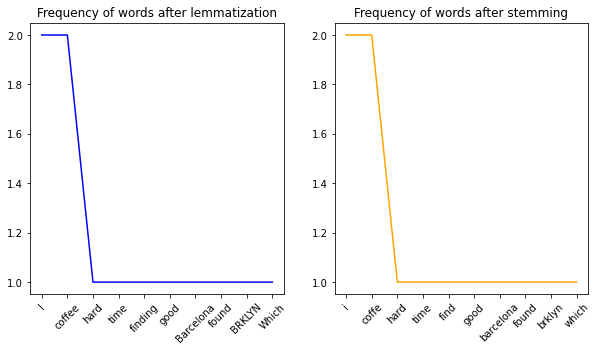

In [196]:
## Conversion to Pandas series via Python Dictionary for easier plotting
frequency_of_lemmatized_words =  pd.Series(dict(frequency_of_lemmatized_words))
frequency_of_stemmed_words = pd.Series(dict(frequency_of_stemmed_words))


fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(10,5))
ax[0].plot(frequency_of_lemmatized_words, color = 'blue', label = 'Lematization')
ax[0].tick_params(axis='x', labelrotation = 45)
ax[0].set_title('Frequency of words after lemmatization')
#ax[0].set_xticklabels(ax[0].get_xticks(),rotation=30)
ax[1].plot(frequency_of_stemmed_words, color = 'orange', label = 'stemming' )
ax[1].tick_params(axis='x', labelrotation = 45)
ax[1].set_title('Frequency of words after stemming')
plt.show()

None of the implemented methods shows any difference in terms of how the frequency of words. Perhaps due to the lenght of the chosen text. It is likely that a longer, more complex text could generate a different distribution depending on the method used. Nevertheless, this dynamic is not present for this kind of text.

### Exercise 3
<br>Perform sentiment analysis on your dataset.

In [197]:
lemmatized_words= ' '.join(lemmatized_words)

In [198]:
lemmatized_words

'I hard time finding good coffee Barcelona I found BRKLYN Which AMAZING coffee delicious treat meal It place invite stay long period perfect environment work last least warm service'

In [199]:
sentiment_analysis = sia()
sentiment_analysis.polarity_scores(lemmatized_words)

{'neg': 0.074, 'neu': 0.461, 'pos': 0.464, 'compound': 0.9522}

The compound score sets a treshold to determine whether a sentence is negative, positive or neutral. A compound score >= 0.05 represents a positive sentiment and therefore the model used has clasified the sentence 'I hard time finding good coffee Barcelona I found BRKLYN Which AMAZING coffee delicious treat meal It place invite stay long period perfect environment work last least warm service' as positive, which is acurate indeed. 